# False Positive and False Negative Error Bounds

##### Samantha Bothwell

July $9^{th}$, 2019

### False Positive 

Let's start with a definition of what a False Positive is. 

**False Positive**: Make the decision to reject the null hypothesis ($H_o$) when the null is true. 

This is the same as a Type I error. We know that the probability that you make a Type I error is $\alpha$ so,

<center>$P(\textrm{False Positive}) = P(\textrm{Reject $H_o$ | True $H_o$}) = \alpha$</center>

Since you can either have a false positive (we'll denote as $FP$) or not, we can say the following:

<center>$FP \sim Binomial(N,\alpha)$,<center>
    
where n is the number of trials. We expect the number of false positives to be $\mu = N\alpha$. The standard deviation, based on the binomial distribution, is $\sigma = \sqrt{N\alpha(1-\alpha)}$. The confidence interval around this mean will be 

<center>$\left[N\alpha - t_{\alpha/2}\sqrt{\frac{N\alpha(1-\alpha)}{N}}, n\alpha - t_{\alpha/2}\sqrt{\frac{N\alpha(1-\alpha)}{N}}\right]$<center>

Where $t_{\alpha/2}$ will be determined by the binomial distribution.


##### Theoretical Confidence Interval

Let's use $\alpha = 0.05$ and $n = 1000$.

The expected number of false positives is $1000 \times 0.05 = \boldsymbol{50}$.

The standard deviation is $\sqrt{1000 \times 0.05 (1-0.05)} = \boldsymbol{6.89}$

To determine the confidence interval we will use python:

In [9]:
# Since we have a large sample size, we will use the normal approximation for the binomial distribution
import math
print(round(50 - 1.96*6.89/math.sqrt(1000),2))
print(round(50 + 1.96*6.89/math.sqrt(1000),2))

49.57
50.43


So, the 95% confidence interval for the number of false positives is **[49.6, 50.4]** - or we can say the 95% confidence interval for the proportion of false positives is [0.0496, 0.0504]

Unfortunately, we cannot always know exactly where our false positives lie. But, we are 95% confident that the true number of false positives present are [49.6, 50.4].

##### Simulation

Let's start with an easy example to determine the number of false positives. We will be using white noise - so we're testing the following hypothesis:
\begin{align}
H_0: &\mu = 0 \\
H_A: &\mu \neq 0
\end{align}

Since the samples are taken from a standard normal distribution we know our null is true. Let's see when we'll reject our null by creating confidence intervals and seeing how many contain 0:

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

# set figure defaults
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

# set seed for reproducible results
np.random.seed(2019)

# create matrix to store confidence intervals
n = 100
matrix = np.zeros((n,4))

### Simulation to create confidence intervals from a standard normal
for i in range(n):
    white_noise = np.random.normal(0,1,1000); 
    mean = np.mean(white_noise)
    var = np.var(white_noise)
    lower = mean - 1.96*np.sqrt(var/1000)
    upper = mean + 1.96*np.sqrt(var/1000)
    
    matrix[i,:] = [mean, var, lower, upper]

    
# Check if CI is too high or too low
too_high = (0 < matrix[:,2])
too_low = (0 > matrix[:,3])

# Proportion of misses - this should be approximately alpha
print("Proportion of misses:" , np.mean(too_low + too_high))

Proportion of misses: 0.04


So, in this case, the proportion of false positives in a sample of 100 replicated of a normal distribution is 0.04 - meaning we have 4 total false positives. We can visualize our 100 confidence intervals and see the 4 replicates that missed $\mu = 0$

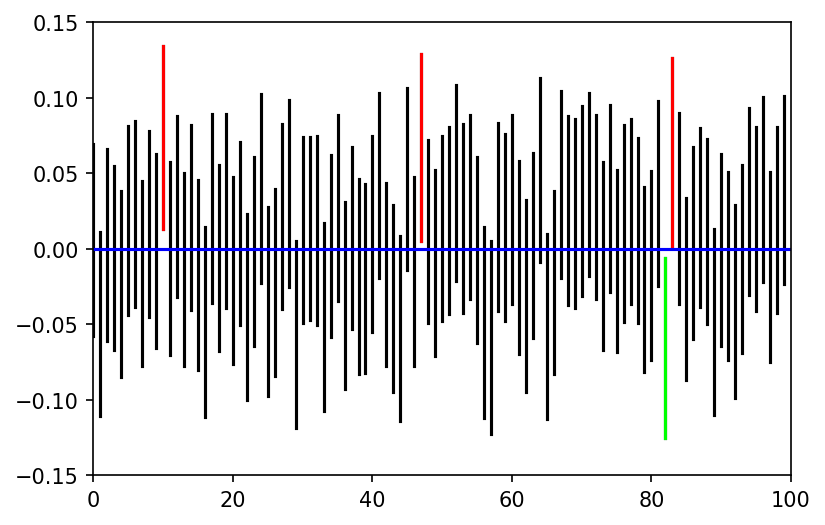

In [127]:
# Get indices of the false positives
xhigh = np.where(0 < matrix[:,2])[0]
xlow = np.where(0 > matrix[:,3])[0]

plt.figure()
plt.axis([0, n, -0.15, 0.15])
x0, y0 = [range(n), range(n)], [matrix[:,2], matrix[:,3]]
x1, y1 = [xhigh, xhigh], [matrix[:,2][too_high], matrix[:,3][too_high]]
x2, y2 = [xlow, xlow], [matrix[:,2][too_low], matrix[:,3][too_low]]
plt.plot(x0, y0, 'black')
plt.plot(x1, y1, 'red')
plt.plot(x2, y2, 'lime')
plt.axhline(y=0, color='blue', linestyle='-')
plt.show()

Based on these confidence intervals, we would reject the null hypothesis for the samples highlighted in green or red. These are all false positives - we reject the null, but the null is true. 

Now let's run some simulations to find the distribution for false positives and the confidence interval. We will use the simulation above but run it 1000 times to get a list of the number of false positives.

In [128]:
# set seed for reproducible results
np.random.seed(2019)

N = 1000
n = 100

# set up matrices to be filled in through simulation
misses = np.zeros((N,1))
CIs = np.zeros((n,3))

# simulation to determine a CI for false positives
for j in range(N):
    for i in range(n):
        white_noise = np.random.normal(0,1,1000); 
        mean = np.mean(white_noise)
        var = np.var(white_noise)
        lower = mean - 1.96*np.sqrt(var/1000)
        upper = mean + 1.96*np.sqrt(var/1000)
    
        matrix[i,:] = [mean, var, lower, upper]
        
    too_high = (0 < matrix[:,2])
    too_low = (0 > matrix[:,3])

    # Update matrix by noting the number of false positives (misses) in the sample
    misses[j] = np.mean(too_low + too_high)

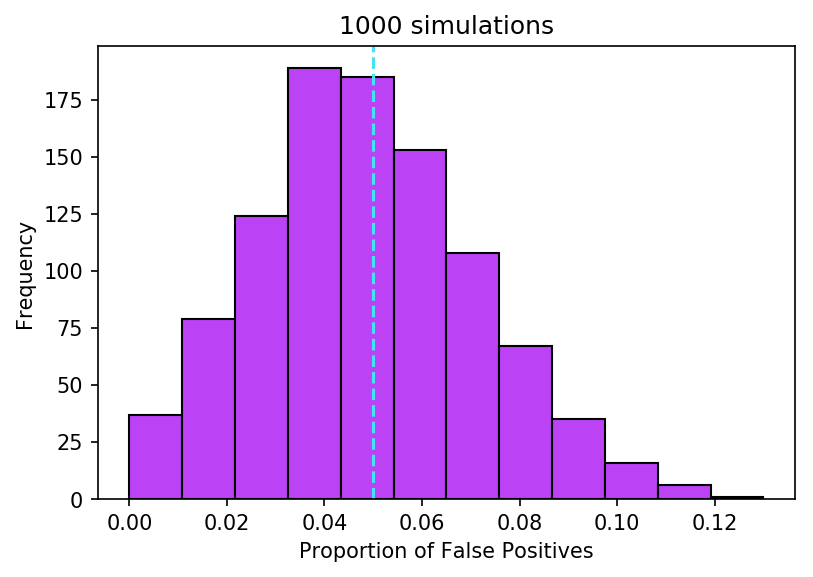

In [141]:
plt.hist(x=misses, bins=12, color='#bc42f5', edgecolor='black')
plt.axvline(x=0.05, color='#42e3f5', linestyle='--') # Plot line at alpha
plt.xlabel('Proportion of False Positives')
plt.ylabel('Frequency')
plt.title('1000 simulations')
plt.show()

Now we can use this simulation to determine the confidence interval for the proportion of false positives - before we found the theoretical confidence interval to be [0.0496, 0.0504]. Let's see how close our simulation came to this:

In [146]:
# Get confidence interval
import scipy.stats

a = 1.0 * np.array(misses)
n = len(a)
m, se = np.mean(a), scipy.stats.sem(a)
h = se * scipy.stats.t.ppf((1 + 0.95) / 2., n-1)
print(m-h, m+h)

[0.0487134] [0.0513466]


Based on the simulations, the 95% confidence interval for the number of false positives is [0.049, 0.051] - this is pretty close to our theoretical calculation. 